In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
data = pd.read_excel('../orders.xlsx')
data.head()

,No,Pada Tanggal,Nama,Menu,Quantity,Total Amount
0,1,2024-02-19 03:38:04,afy,"Regal, Rum",2,50
1,2,2024-02-20 03:14:04,afy,"Regal, Rum",3,70
2,3,2024-02-20 08:53:19,afy,"Regal, Rum, Regal",3,70
3,4,2024-02-20 12:07:57,blek,Regal,1,20
4,5,2024-02-20 12:08:47,blek,"Rum, Regal",2,50


In [4]:
data.columns

Index(['No', 'Pada Tanggal', 'Nama', 'Menu', 'Quantity', 'Total Amount'], dtype='object')

In [5]:
data['Pada Tanggal'] = pd.to_datetime(data['Pada Tanggal'])

In [6]:
#memcah kolom produk menajdi baris baru
data['Menu'] = data['Menu'].str.split(', ')
data = data.explode('Menu')

In [7]:
#cek duplikat
duplicate_mask = data.duplicated()
print(data[duplicate_mask])

   No        Pada Tanggal Nama   Menu  Quantity  Total Amount
2   3 2024-02-20 08:53:19  afy  Regal         3            70


In [8]:
#cek missing value
sel_kosong = data.isnull()
if sel_kosong.any().any():
    print("Terdapat setidaknya satu sel kosong dalam tabel.")
else:
    print("Tidak ada sel kosong dalam tabel.")

Tidak ada sel kosong dalam tabel.


In [9]:
#normalisasi
data['Menu'] = data['Menu'].str.lower()

In [10]:
data

,No,Pada Tanggal,Nama,Menu,Quantity,Total Amount
0,1,2024-02-19 03:38:04,afy,regal,2,50
0,1,2024-02-19 03:38:04,afy,rum,2,50
1,2,2024-02-20 03:14:04,afy,regal,3,70
1,2,2024-02-20 03:14:04,afy,rum,3,70
2,3,2024-02-20 08:53:19,afy,regal,3,70
2,3,2024-02-20 08:53:19,afy,rum,3,70
2,3,2024-02-20 08:53:19,afy,regal,3,70
3,4,2024-02-20 12:07:57,blek,regal,1,20
4,5,2024-02-20 12:08:47,blek,rum,2,50
4,5,2024-02-20 12:08:47,blek,regal,2,50


In [11]:
#menampilkan seluruh data
basket=(data.groupby(['No','Menu'])['Quantity']
        .sum().unstack().reset_index().fillna(0) #menjumlahkan, membuat tabel, mereset index, menganti missing value dengan 0
        .set_index('No')) #menetapan index mnejadi no
basket

Menu,kopi susu,regal,rum
No,,,
1,0.0,2.0,2.0
2,0.0,3.0,3.0
3,0.0,6.0,3.0
4,0.0,1.0,0.0
5,0.0,2.0,2.0
6,0.0,2.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


In [12]:
#one hot encoding
def hot_encode(x):
  if(x<=0):
    return 0
  if(x>=0):
    return 1

In [13]:
#menampilkan hasil one hot encoding
basket_encode = basket.applymap(hot_encode)
basket = basket_encode
basket

/var/folders/qq/b5b4dyyx0bd8mcy2qnx65v0r0000gn/T/ipykernel_5793/4063697684.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encode = basket.applymap(hot_encode)


Menu,kopi susu,regal,rum
No,,,
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,0
5,0,1,1
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [14]:
#model
frq_items = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frq_items, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence','lift'],ascending=[False,False])
rules

/Users/user/.local/share/virtualenvs/python-nlEX9Ns4/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,"(kopi susu, regal)",(rum),0.0625,0.4375,0.0625,1.000000,2.285714,0.035156,inf,0.600000
0,(rum),(regal),0.4375,0.8750,0.4375,1.000000,1.142857,0.054688,inf,0.222222
2,"(kopi susu, rum)",(regal),0.0625,0.8750,0.0625,1.000000,1.142857,0.007812,inf,0.133333
1,(regal),(rum),0.8750,0.4375,0.4375,0.500000,1.142857,0.054688,1.125000,1.000000
4,(rum),"(kopi susu, regal)",0.4375,0.0625,0.0625,0.142857,2.285714,0.035156,1.093750,1.000000
5,(regal),"(kopi susu, rum)",0.8750,0.0625,0.0625,0.071429,1.142857,0.007812,1.009615,1.000000


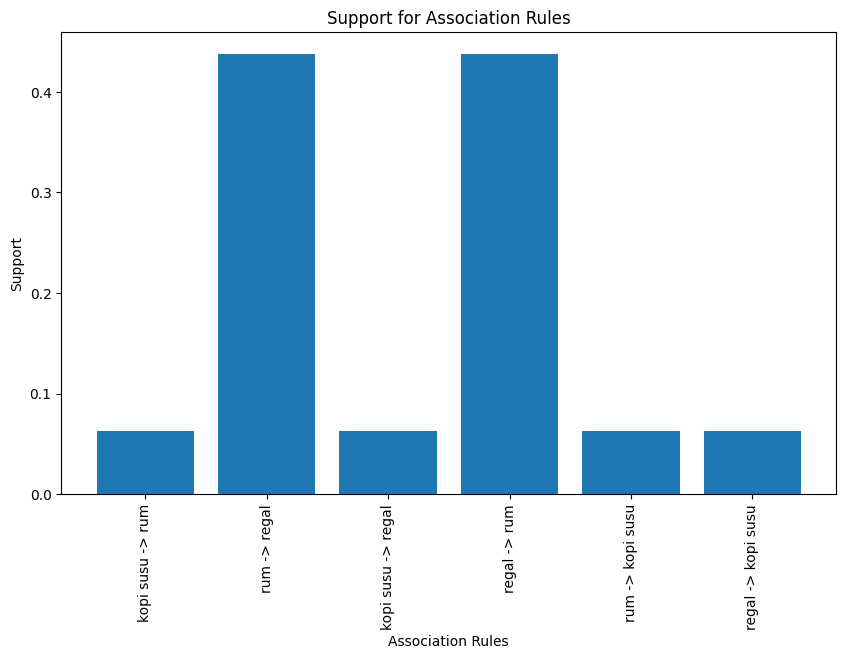

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(rules)), rules['support'], tick_label=rules['antecedents'].apply(lambda x: list(x)[0] if isinstance(x, frozenset) else x)
.astype(str) + ' -> ' + rules['consequents'].apply(lambda x: list(x)[0] if isinstance(x, frozenset) else x)
.astype(str))
plt.xlabel('Association Rules')
plt.ylabel('Support')
plt.title('Support for Association Rules')
plt.xticks(rotation=90)
plt.show()


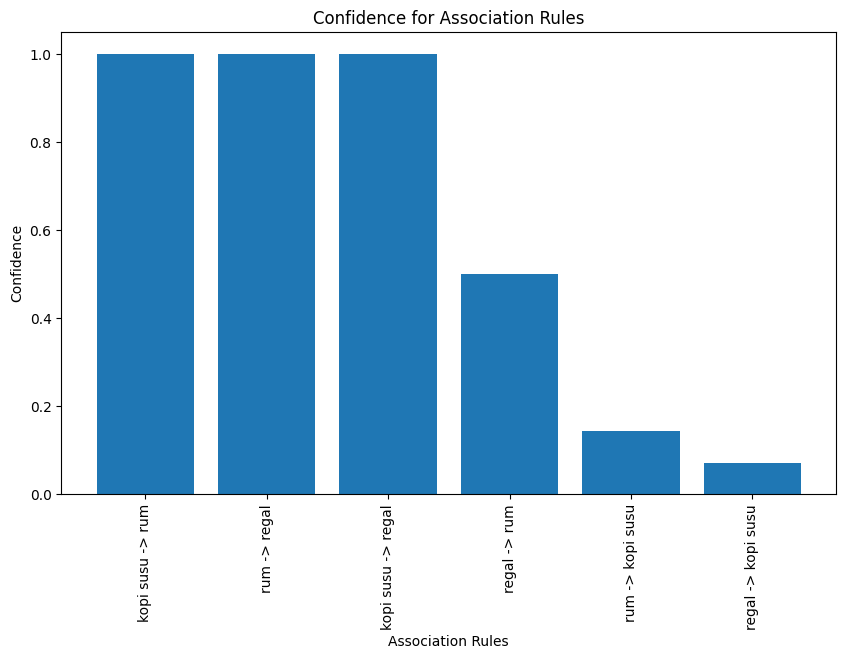

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(rules)), rules['confidence'].apply(lambda x: list(x)[0] if isinstance(x, frozenset) else x), tick_label=rules['antecedents'].apply(lambda x: list(x)[0] if isinstance(x, frozenset) else x)
.astype(str) + ' -> ' + rules['consequents'].apply(lambda x: list(x)[0] if isinstance(x, frozenset) else x)
.astype(str))
plt.xlabel('Association Rules')
plt.ylabel('Confidence')
plt.title('Confidence for Association Rules')
plt.xticks(rotation=90)
plt.show()

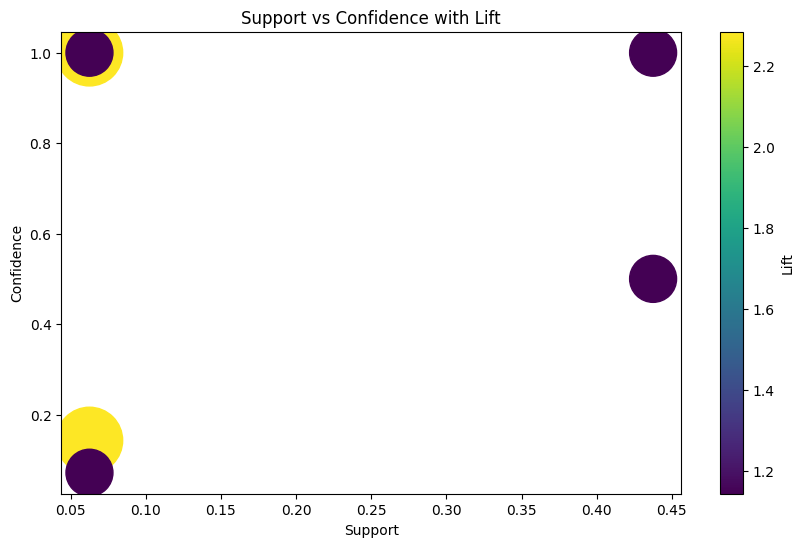

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', s=np.multiply(rules['lift'], 1000))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence with Lift')
plt.colorbar(label='Lift')
plt.show()

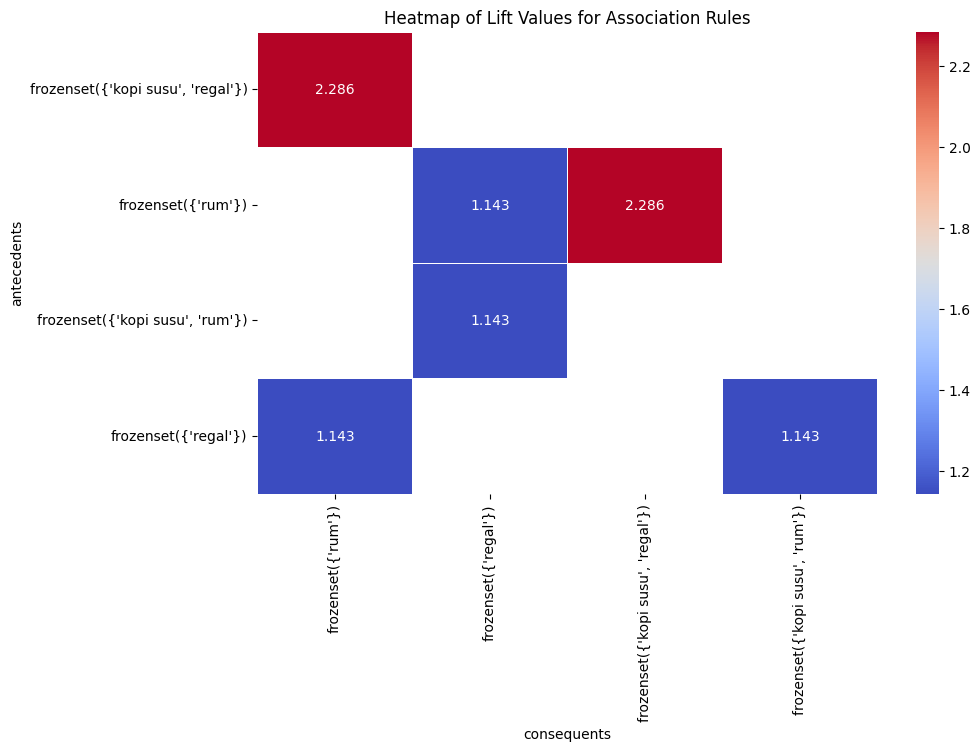

In [18]:
heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values='lift')

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Heatmap of Lift Values for Association Rules')
plt.show()